<a href="https://colab.research.google.com/github/shitizz24/Automation-Stuff/blob/master/CNN_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import pandas as pd

In [2]:
df = pd.read_csv("./testset.csv")

In [3]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [5]:
df[' _tempm'].isna().sum()

0

In [6]:
def get_year(x):
  return x[0:4]

In [7]:
def get_month(x):
  return x[5:7]

In [8]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [9]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [10]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [11]:
data = data.resample('D').mean()

In [12]:
data.temp.isna().sum()

141

In [13]:
data.shape

(7480, 1)

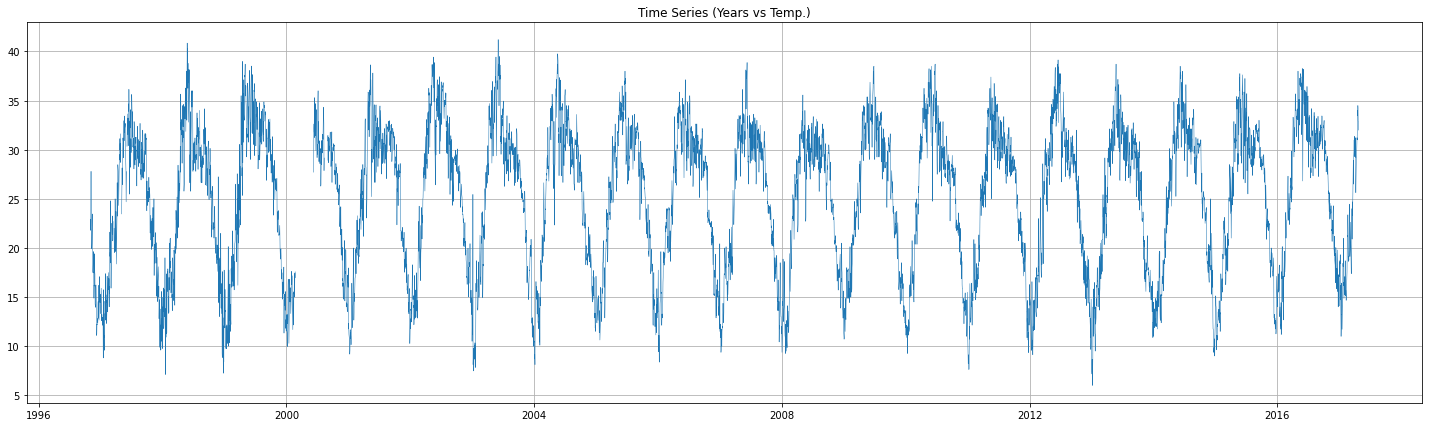

In [14]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [16]:
timestep = 48                                                                                                                                                                                                                                                                                                    
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [17]:
import numpy as np
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [18]:
k = 35000
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0],  Xtrain.shape[1],1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1],1))

In [19]:
model = Sequential()
model.add(LSTM(128, batch_input_shape=(None,timestep,1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [20]:
history = model.fit(Xtrain,Ytrain,epochs=10,verbose=1,batch_size=32) 

Epoch 1/10
233/233 [==============================] - 26s 110ms/step - loss: nan
Epoch 2/10
233/233 [==============================] - 26s 110ms/step - loss: nan
Epoch 3/10
233/233 [==============================] - 26s 112ms/step - loss: nan
Epoch 4/10
233/233 [==============================] - 26s 113ms/step - loss: nan
Epoch 5/10
233/233 [==============================] - 26s 111ms/step - loss: nan
Epoch 6/10
233/233 [==============================] - 26s 113ms/step - loss: nan
Epoch 7/10
233/233 [==============================] - 26s 113ms/step - loss: nan
Epoch 8/10
233/233 [==============================] - 27s 116ms/step - loss: nan
Epoch 9/10
233/233 [==============================] - 26s 112ms/step - loss: nan
Epoch 10/10
233/233 [==============================] - 26s 112ms/step - loss: nan


In [24]:
pred = model.predict(Xtest)

UnboundLocalError: ignored

In [ ]:
predict = scalar.inverse_transform(predict)

In [ ]:
Ytesting = scalar.inverse_transform(y_test)

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)